## Naive Bayes

Naive Bayes is a family of simple yet powerful probabilistic classifiers based on applying Bayes’ theorem with strong (naive) independence assumptions between features. It is widely used in machine learning for tasks such as text classification, spam detection, and sentiment analysis.

### Key Concepts

- **Bayes’ Theorem:**  
    \[
        P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
    \]
    Naive Bayes uses this theorem to compute the probability of a class given the input features.

- **Naive Assumption:**  
    The model assumes that all features are independent of each other given the class label, which simplifies computation.

### Types of Naive Bayes Classifiers

- **Gaussian Naive Bayes:** Assumes features follow a normal distribution.
- **Multinomial Naive Bayes:** Suitable for discrete features (e.g., word counts in text).
- **Bernoulli Naive Bayes:** Suitable for binary/boolean features.

### Advantages

- Simple and fast to train.
- Works well with high-dimensional data.
- Performs well with small datasets.

### Limitations

- The independence assumption is often unrealistic in real-world data.
- May not perform well if features are highly correlated.

### Applications

- Email spam filtering
- Document classification
- Sentiment analysis

Naive Bayes remains a popular baseline method due to its simplicity, interpretability, and efficiency.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset/ecosystem_data.csv')
# Display the first few rows of the dataset
data.head()

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,degraded
1,95.071431,99.873629,0.184512,45.929245,4.021498,degraded
2,73.199394,52.846174,0.346640,96.449852,4.194976,degraded
3,59.865848,182.180001,0.663281,21.897845,4.493691,degraded
4,15.601864,142.987248,0.482089,58.785642,4.620093,degraded


In [3]:
# Encode target labels
data['ecosystem_health'] = data['ecosystem_health'].map({'healthy': 0, 'at risk': 1, 'degraded': 2})

In [4]:
X = data[['water_quality', 'air_quality_index', 'biodiversity_index', 'vegetation_cover', 'soil_ph']]
y = data['ecosystem_health']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [7]:
y_pred = model.predict(x_test)
# Evaluate the model
print(y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

[2 2 1 ... 2 2 2]
Accuracy: 0.9515


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.29      0.43        21
           1       0.90      0.63      0.74       222
           2       0.96      1.00      0.98      1757

    accuracy                           0.95      2000
   macro avg       0.91      0.64      0.72      2000
weighted avg       0.95      0.95      0.95      2000



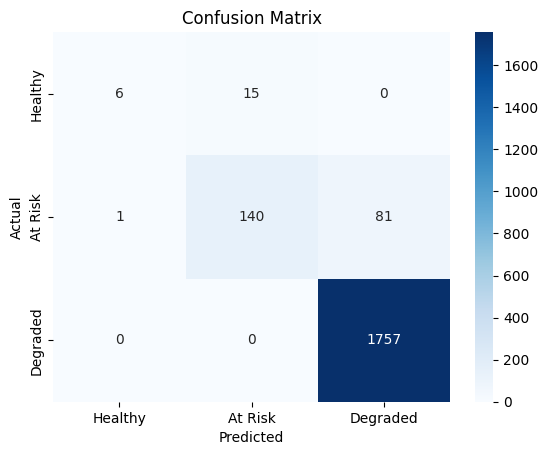

In [8]:
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.Figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy', 'At Risk', 'Degraded'], 
            yticklabels=['Healthy', 'At Risk', 'Degraded'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Save the model for future use

In [9]:
import joblib
joblib.dump(model, 'models/ecosystem_health_model.pkl')


['models/ecosystem_health_model.pkl']